\newpage

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import neighbors
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

from ucimlrepo import fetch_ucirepo 

(1)

The objective of this analysis is to build a supervised classification model that predicts whether a patient has heart disease using various clinical features such as age, cholesterol level, chest pain type, and other diagnostic indicators.
The target variable, num, is transformed into a binary outcome for classification purposes:

1 indicates the presence of heart disease

0 indicates no heart disease

In [48]:
heart_disease = fetch_ucirepo(id=45) 
   
X = heart_disease.data.features 
y = heart_disease.data.targets 

df =heart_disease.data.original


(2)

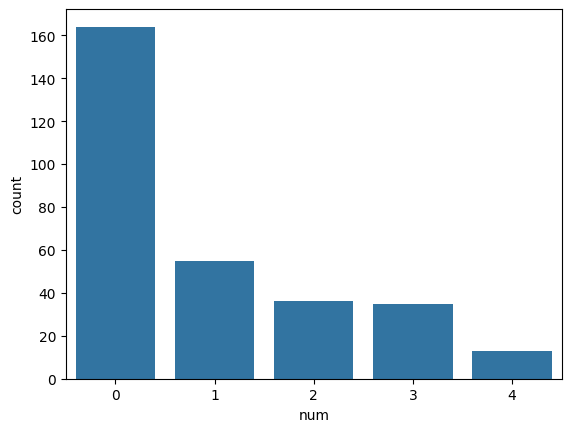

In [49]:
 sns.countplot(
 data=y,
 x = 'num'
 )
 plt.show()

In [50]:
X = heart_disease.data.features
filtered_X_ori = df[X.columns]
filtered_y = df['num']
filtered_X = scale(filtered_X_ori)
df['num']= df['num'].astype('category')

Standardization is applied to numeric features to ensure fair contribution across features. This is important because clinical variables are measured on different scales. Without scaling, features with larger numeric ranges could dominate the model, especially in algorithms like KMeans clustering.

Target variable num is cast as a categorical variable for classification.

(3)

(303, 14)
        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2    

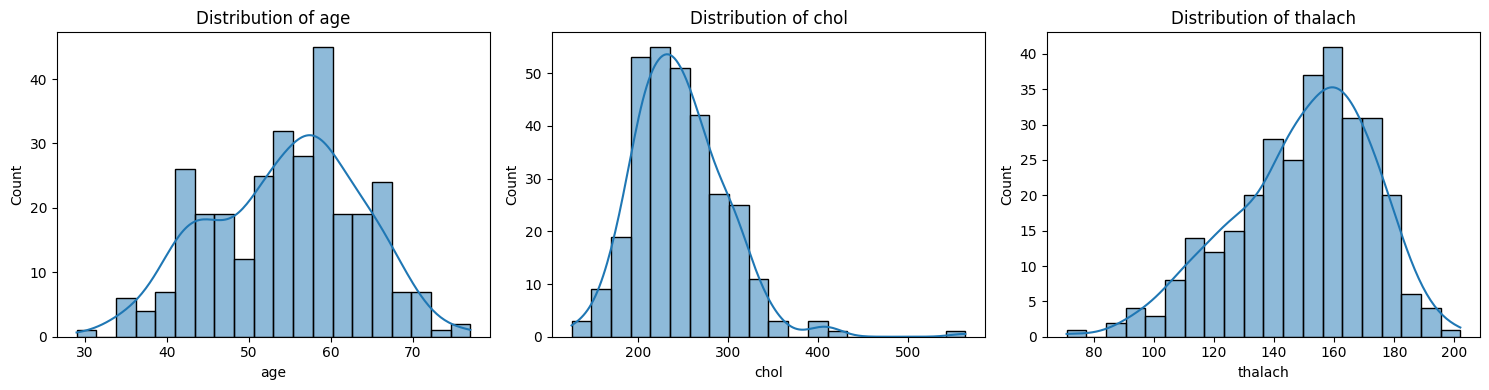

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df.shape)

print(heart_disease.variables)

print(df.describe(include='all'))


numerical_features = ['age', 'chol', 'thalach']

plt.figure(figsize=(15, 4))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

The dataset consists of 303 patient records and 14 clinical attributes, including the target variable num, which indicates heart disease status.

It contains a mix of continuous variables,such as age, chol, and thalach and categorical variables encoded as integers, such as sex, cp, and fbs.

The dataset features are primarily represented as integers and floating-point numbers, while the target variable has been explicitly converted to a categorical type to support classification modeling. Although some categorical variables are stored as numeric values, they represent discrete categories rather than continuous measurements.

Distributions show variance across features, with values such as age ranges from 29 to 77 years with a mean around 54, and chol ranges from 126 to 564, which is slightly right-skewed.

(4)

In [59]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0).astype('category')

C:\Users\vivia\AppData\Local\Temp\ipykernel_24620\408150707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0).astype('category')


(5)

Correlation of features with heart disease:
 num         1.000000
thal        0.526640
ca          0.463189
oldpeak     0.424052
exang       0.421355
cp          0.408945
slope       0.333049
sex         0.278467
age         0.227075
restecg     0.166343
trestbps    0.153490
chol        0.080285
fbs         0.003167
thalach    -0.423817
Name: num, dtype: float64


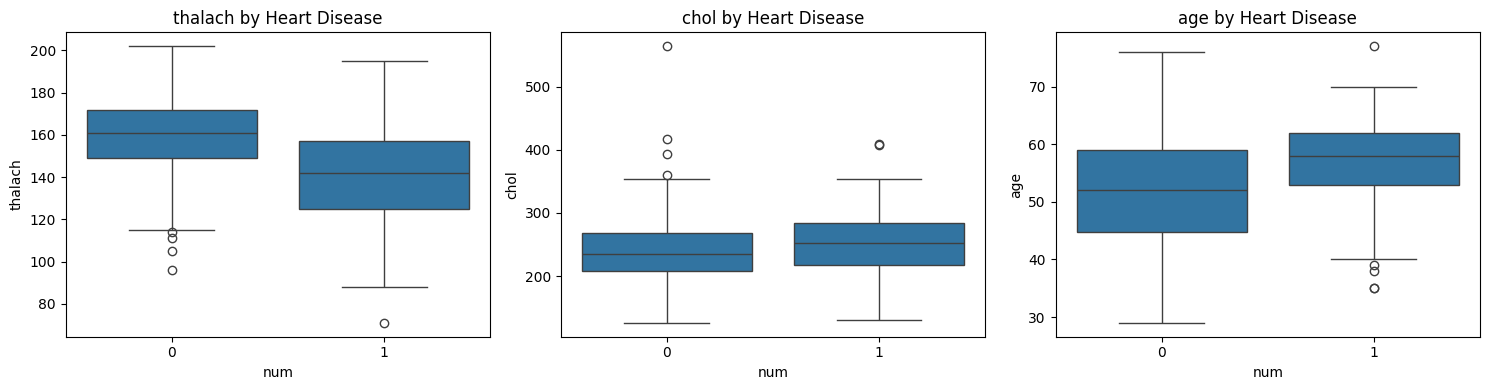

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_clean = filtered_X_ori.copy()
df_clean['num'] = filtered_y

df_clean = df_clean.dropna()

df_clean.loc[:, 'num'] = df_clean['num'].apply(lambda x: 1 if x > 0 else 0)

correlations = df_clean.corr(numeric_only=True)['num'].sort_values(ascending=False)
print("Correlation of features with heart disease:\n", correlations)

features_to_plot = ['thalach', 'chol', 'age']

plt.figure(figsize=(15, 4))
for i, feature in enumerate(features_to_plot):
    plt.subplot(1, len(features_to_plot), i + 1)
    sns.boxplot(x='num', y=feature, data=df_clean)
    plt.title(f"{feature} by Heart Disease")
plt.tight_layout()
plt.show()


thalach has a moderate negative correlation with heart disease, with a correlation coefficient of –0.42. The boxplot reveals that patients without heart disease tend to have higher maximum heart rates compared to those with heart disease. This suggests that thalach is a strong predictive feature and should be prioritized in feature selection.

chol shows a very weak positive correlation with heart disease, with a coefficient of just 0.08. The boxplot displays a large overlap in cholesterol levels across both classes, indicating that this feature does not significantly differ between patients with and without heart disease. As such, chol may have limited utility as a predictor in this dataset.

age has a mild positive correlation with heart disease, at 0.23. From the boxplot, it's evident that patients with heart disease are generally older than those without. While not the strongest individual predictor, age is clinically meaningful and should be included as a supporting feature in the classification model.


(6)

In [ ]:
missing_counts = df.isnull().sum()
print(missing_counts)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [ ]:
df = df.dropna()
len(df)

297

There are 297 observations remain in the dataset after dropping rows with missing values.

（7）

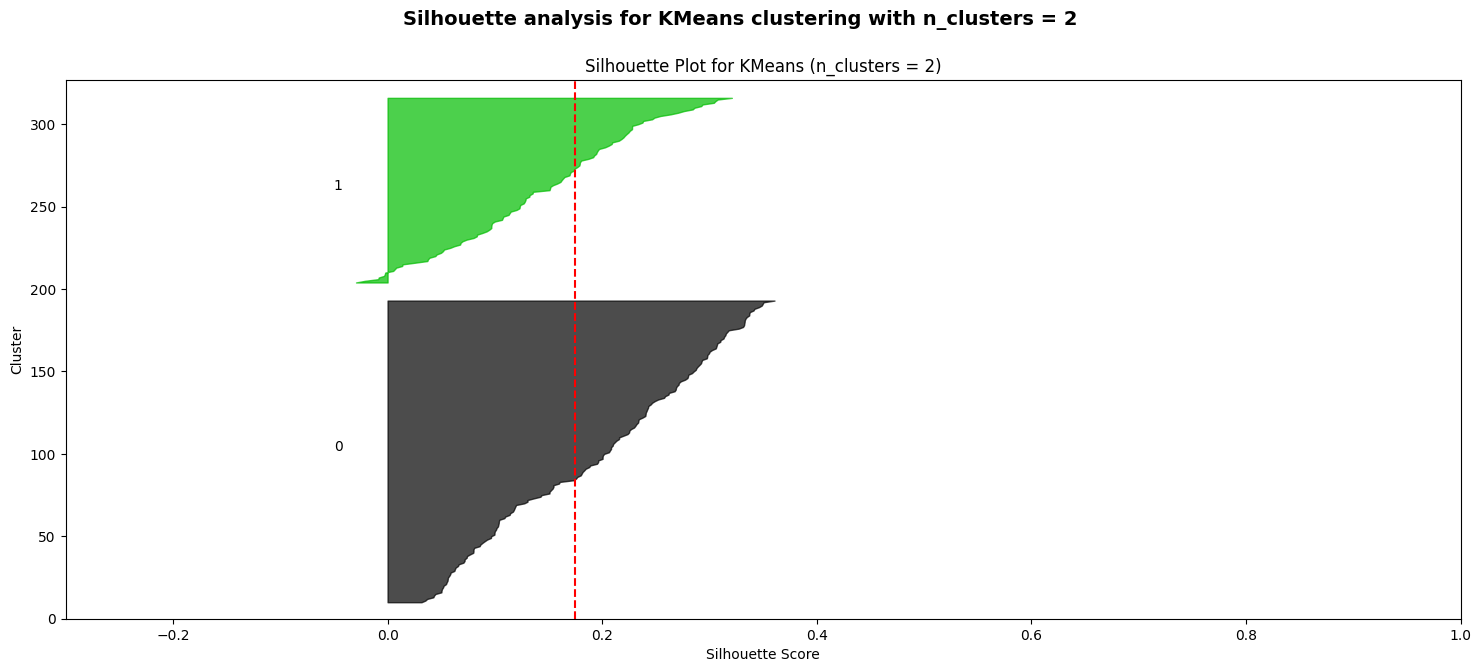

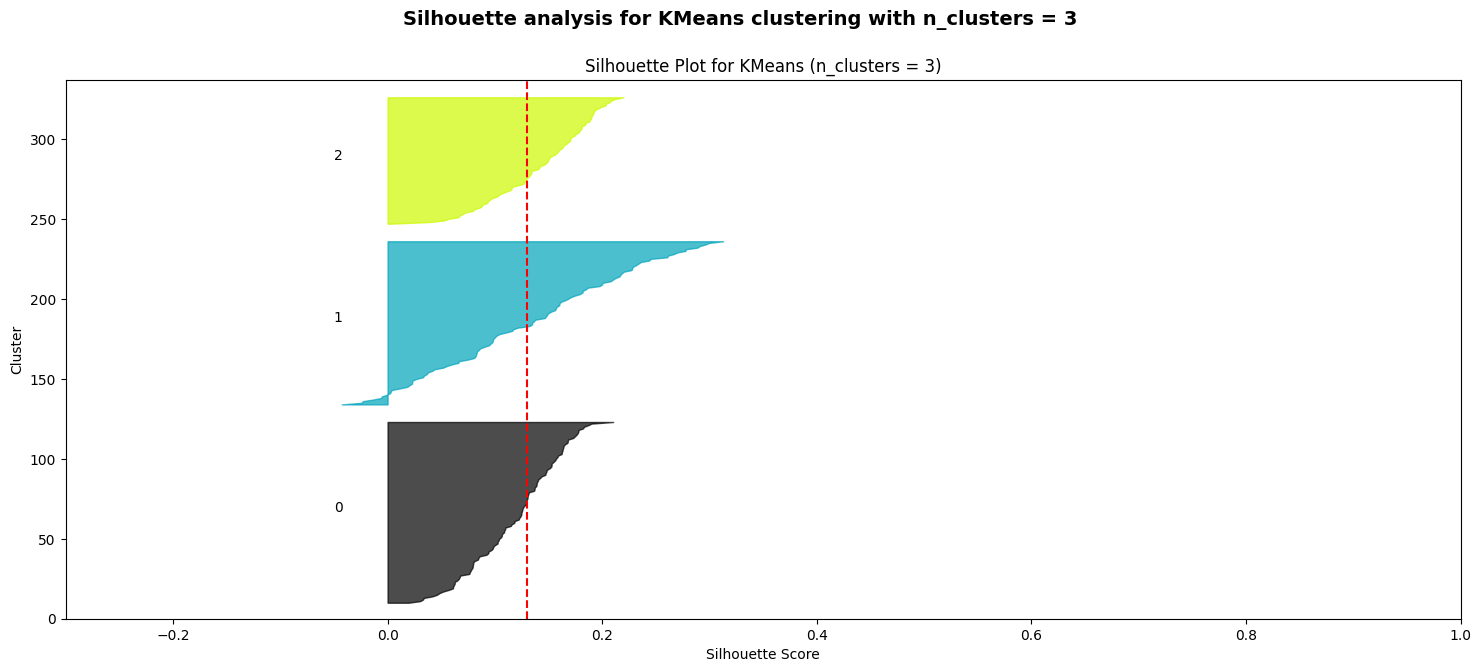

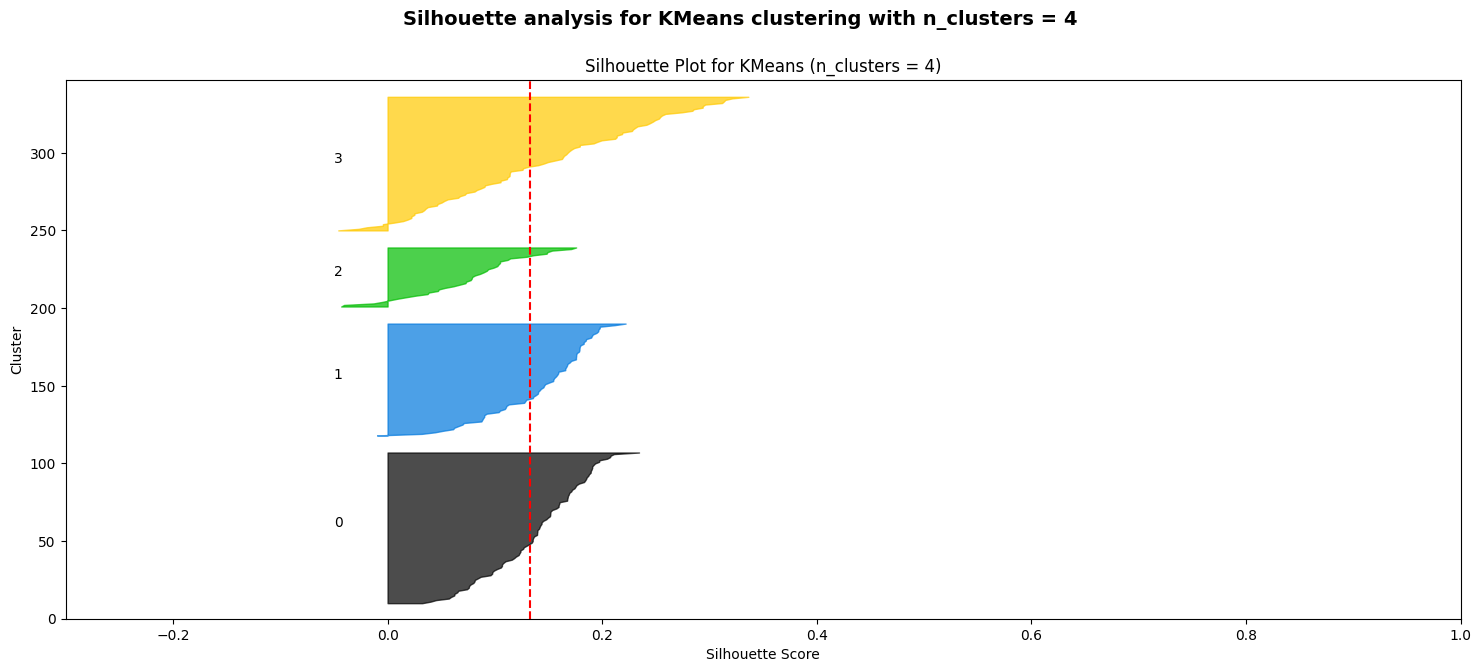

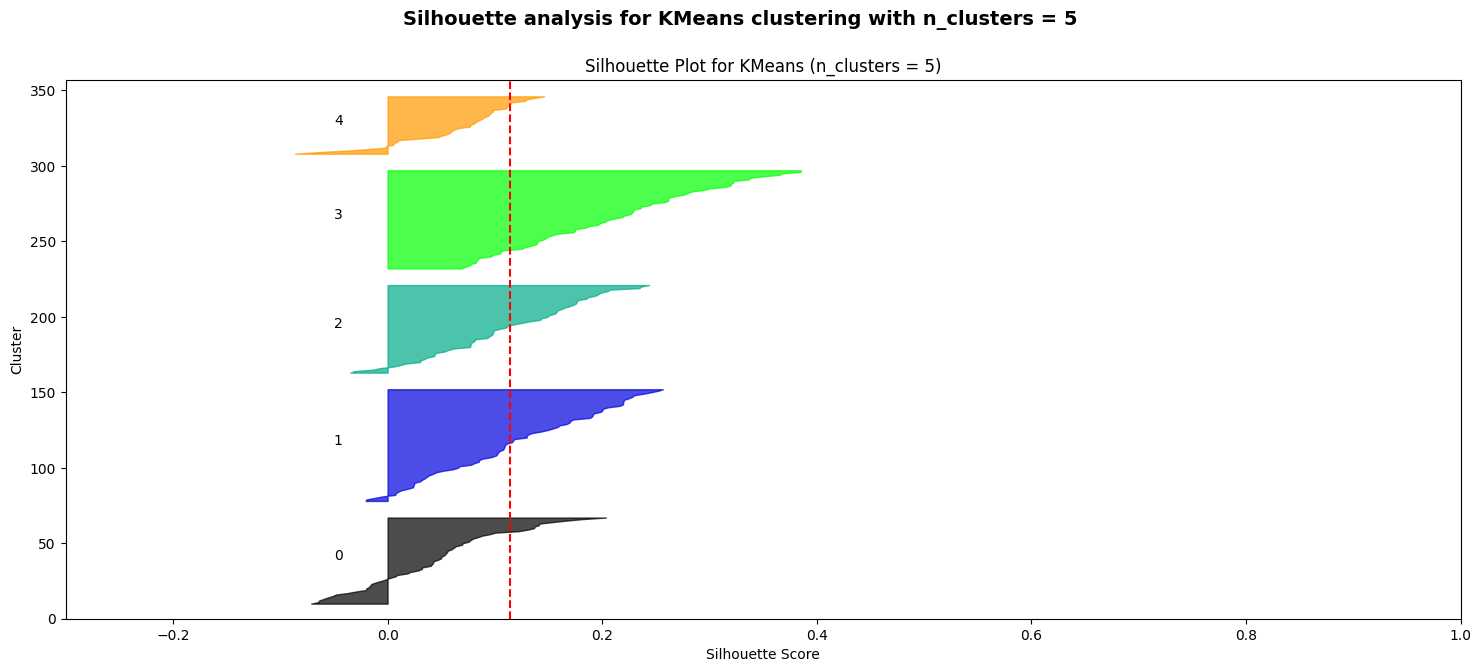

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA

filtered_X_ori = filtered_X_ori.dropna()
df = df.loc[filtered_X_ori.index]  

from sklearn.preprocessing import scale
filtered_X = scale(filtered_X_ori)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(filtered_X)

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, n_init=20, random_state=0)
    cluster_labels_km = km.fit_predict(filtered_X)

    silhouette_avg_km = silhouette_score(filtered_X, cluster_labels_km)
    sample_silhouette_values = silhouette_samples(filtered_X, cluster_labels_km)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.3, 1])
    ax1.set_ylim([0, len(filtered_X) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    ax1.set_title(f"Silhouette Plot for KMeans (n_clusters = {n_clusters})")
    ax1.set_xlabel("Silhouette Score")
    ax1.set_ylabel("Cluster")
    plt.suptitle(f"Silhouette analysis for KMeans clustering with n_clusters = {n_clusters}",
                 fontsize=14, fontweight='bold')
    plt.show()


Choose k=2, as it has a relatively high average silhouette score, indicating better-defined clusters. Besides, k=2 shows clusters of more evenly sized and well-separated, with fewer negative silhouette scores compared to k=3.

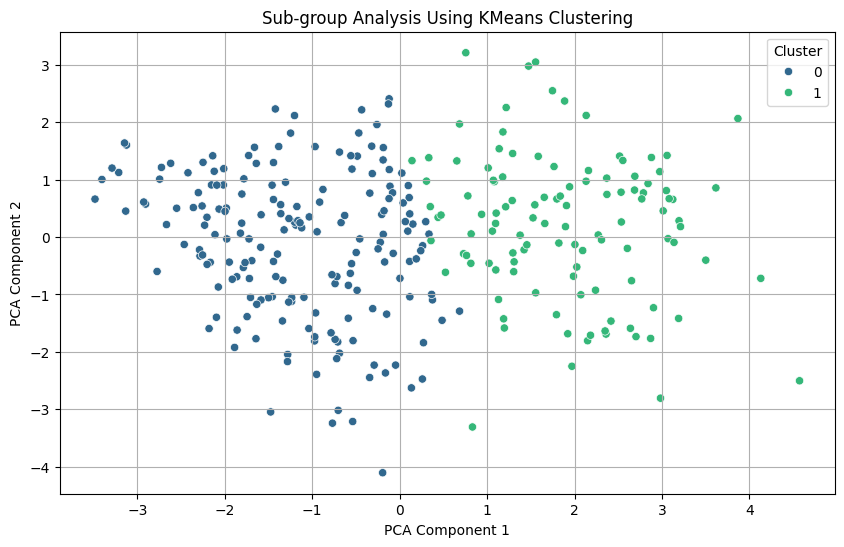

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = df.select_dtypes(include=['float64', 'int64'])

from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(numeric_features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis')
plt.title("Sub-group Analysis Using KMeans Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


KMeans clustering revealed two distinct sub-groups within the dataset based solely on numerical features. These clusters likely capture underlying differences in patient physiological profiles, such as variations in age, blood pressure, or cholesterol levels. 

Citing list: Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1989). Heart Disease [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.